## Conditions of linear regression

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

C:\Users\Minerva\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load the data into a pandas dataframe
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Linear relationship between Y and Xs

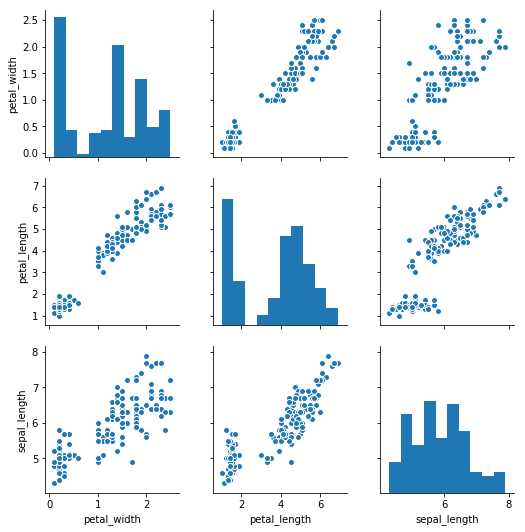

In [4]:
sns.pairplot(iris[['petal_width', 'petal_length', 'sepal_length']].dropna(how = 'any', axis = 0))

In [5]:
#Multiple Linear regression
#
X = iris[["petal_length","sepal_length"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y = iris["petal_width"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     962.1
Date:                Sat, 02 Sep 2017   Prob (F-statistic):           3.60e-85
Time:                        01:59:02   Log-Likelihood:                 26.792
No. Observations:                 150   AIC:                            -47.58
Df Residuals:                     147   BIC:                            -38.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0090      0.182     -0.049   

In [ ]:
#JB test: test for normal distribution of residuals
## H0: The null hypothesis for the test is that the data are normally distributed (in this case residuals)

# Unfortunately, with small samples the Jarque-Bera test is prone rejecting the null hypothesis–
#that the distribution is normal–when it is in fact true 

In [6]:
res = results.resid

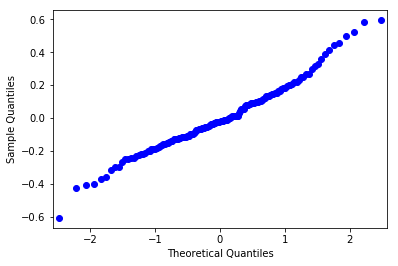

In [7]:
sm.qqplot(res)
plt.show()

In [ ]:
#Durbin-watson: used for measuring autocorrelation
#pproximately equal to 2(1-r), where r is the sample autocorrelation

#ranges from zero to four, and a value around two suggests that there is no autocorrelation. 
#Values greater than two suggest negative correlation, and values less that one suggest positive correlation

### Multicollinearity

In [8]:
#condition no.: used for measuring multi-collinearity
# cond no>30 means multi-collinearity
#influences the stability & reliability of coefficents

In [9]:
corr=X.corr() #correlation bw predictors
print(corr)

              const  petal_length  sepal_length
const           NaN           NaN           NaN
petal_length    NaN      1.000000      0.871754
sepal_length    NaN      0.871754      1.000000


## heteroscedasticity

### test whether the variance of the errors from a regression is dependent on the values of the independent variables
### there should ne relation or pattern between residuals and fitted values, i.e. we want homoscedasticity
### breusch-pagan test
### h0: null hypothesis of the Breusch-Pagan test is homoscedasticity (= variance does not depend on auxiliary regressors)

In [10]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [11]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

C:\Users\Minerva\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


[('Lagrange multiplier statistic', 23.534479417490889),
 ('p-value', 7.7544808402163839e-06),
 ('f-value', 13.677911807250478),
 ('f p-value', 3.5665183433605118e-06)]

In [ ]:
#reject the null hypothesis that the variance of the residuals is constant and infer that heteroscedasticity is indeed present

## Influence Test

### plot helps us to find influential cases (i.e., subjects) if any. Not all outliers are influential in linear regression analysis 
### outlying values at the upper right corner or at the lower right corner

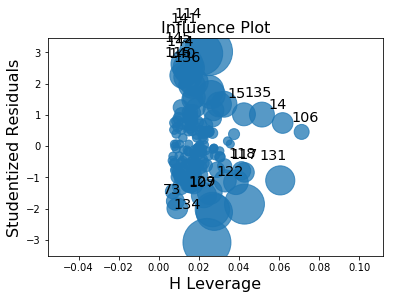

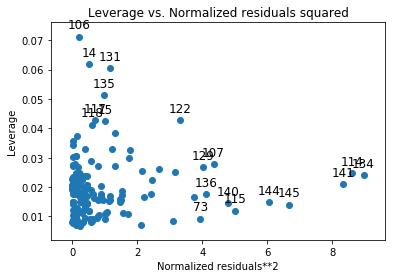

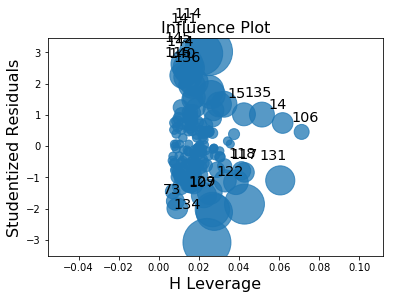

In [12]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(results)
influence_plot(results)